In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import numpy as np
import pandas as pd

In [2]:
input_xlsx = pd.read_excel( './data/E_Commerce_Dataset.xlsx' , sheet_name='E Comm' )
input_xlsx.to_csv(r'./data/E_Commerce_Dataset.csv', index = None, header=True)

In [6]:
input_xlsx.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
input_data = './data/E_Commerce_Dataset.csv'

mode = 'independent_attribute_mode'
description_file = f'./out/{mode}/description.json'
synthetic_data = f'./out/{mode}/sythetic_data.csv'

In [7]:
threshold_value = 20 

categorical_attributes = {'OrderAmountHikeFromlastYear': True}

candidate_keys = {'DaySinceLastOrder': False}

num_tuples_to_generate = 32561

In [9]:
describer = DataDescriber( category_threshold = threshold_value )
describer.describe_dataset_in_independent_attribute_mode( dataset_file = input_data,
                                                          attribute_to_is_categorical = categorical_attributes,
                                                          attribute_to_is_candidate_key = candidate_keys)
describer.save_dataset_description_to_file( description_file )

In [11]:
generator = DataGenerator( )
generator.generate_dataset_in_independent_mode( num_tuples_to_generate, description_file )
generator.save_synthetic_data( synthetic_data )

### Comparando Dados

In [12]:
input_df = pd.read_csv( input_data, skipinitialspace=True )
synthetic_df = pd.read_csv( synthetic_data )

attribute_description = read_json_file( description_file )['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description )

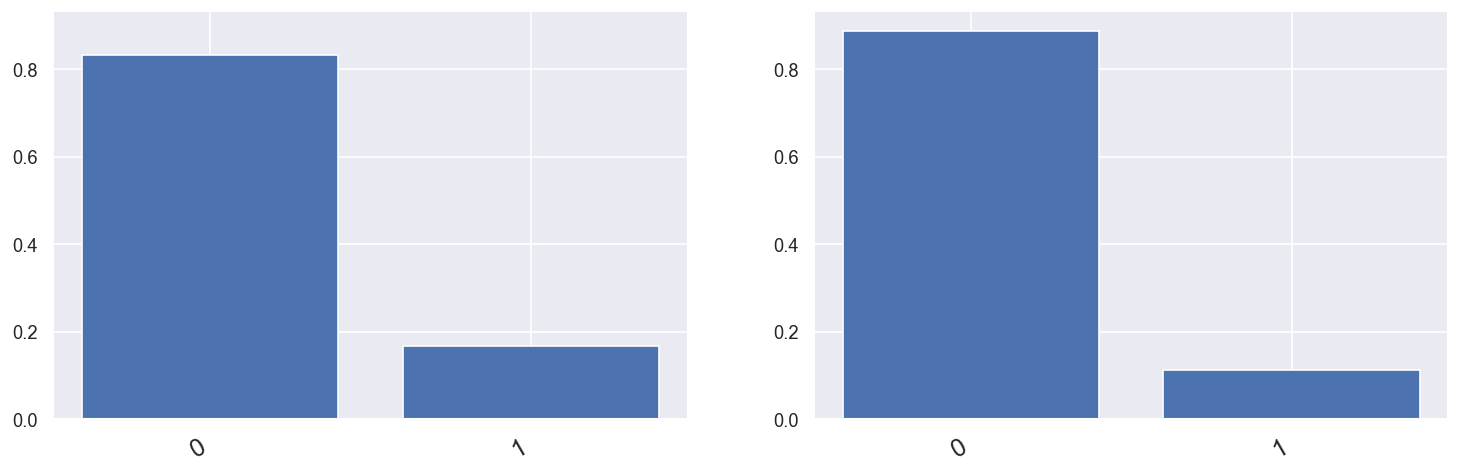

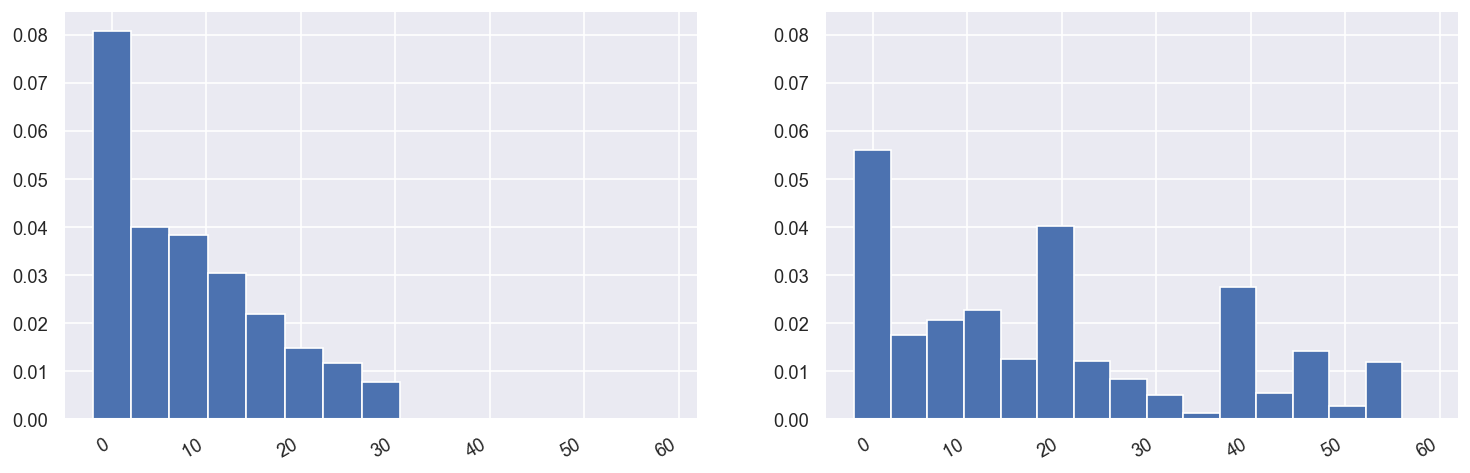

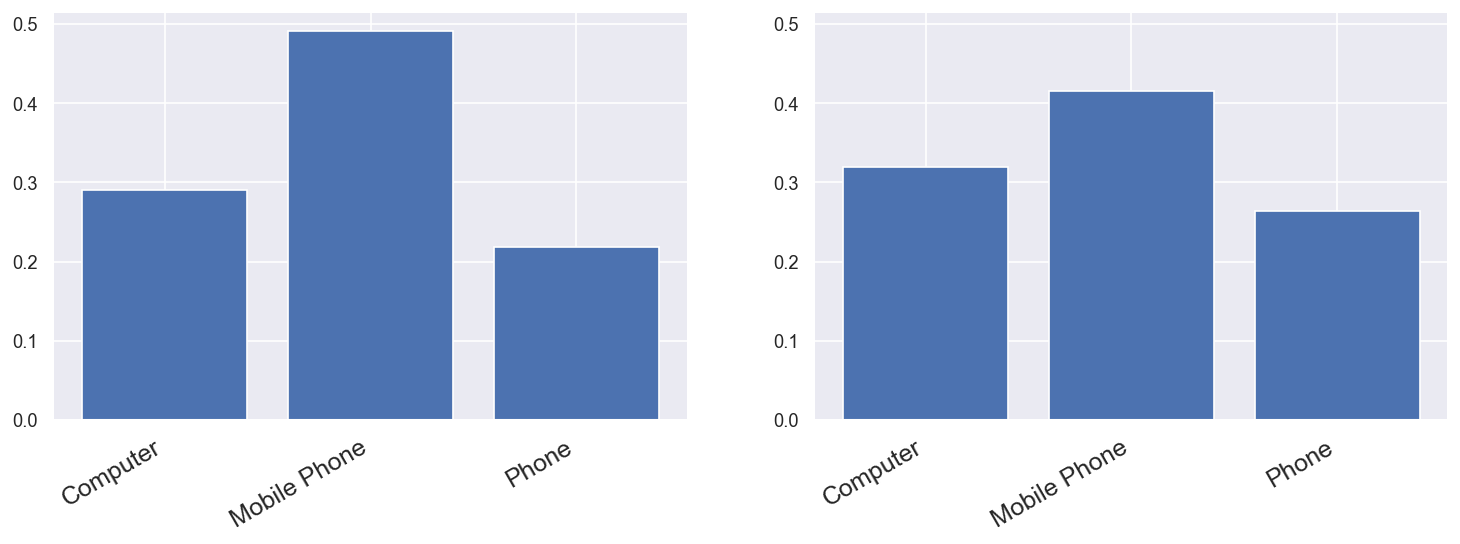

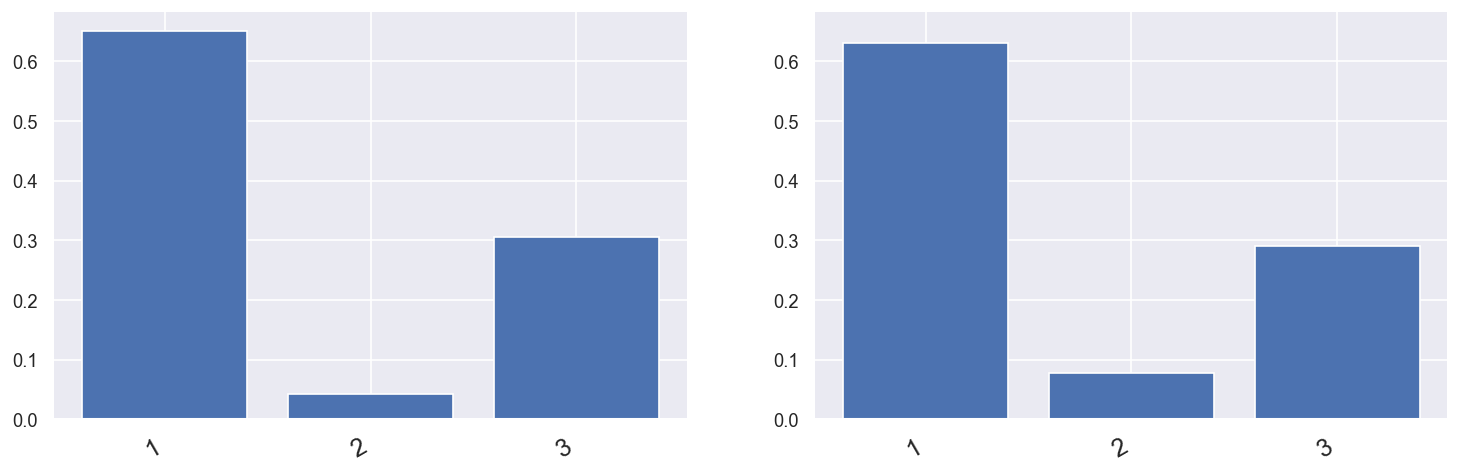

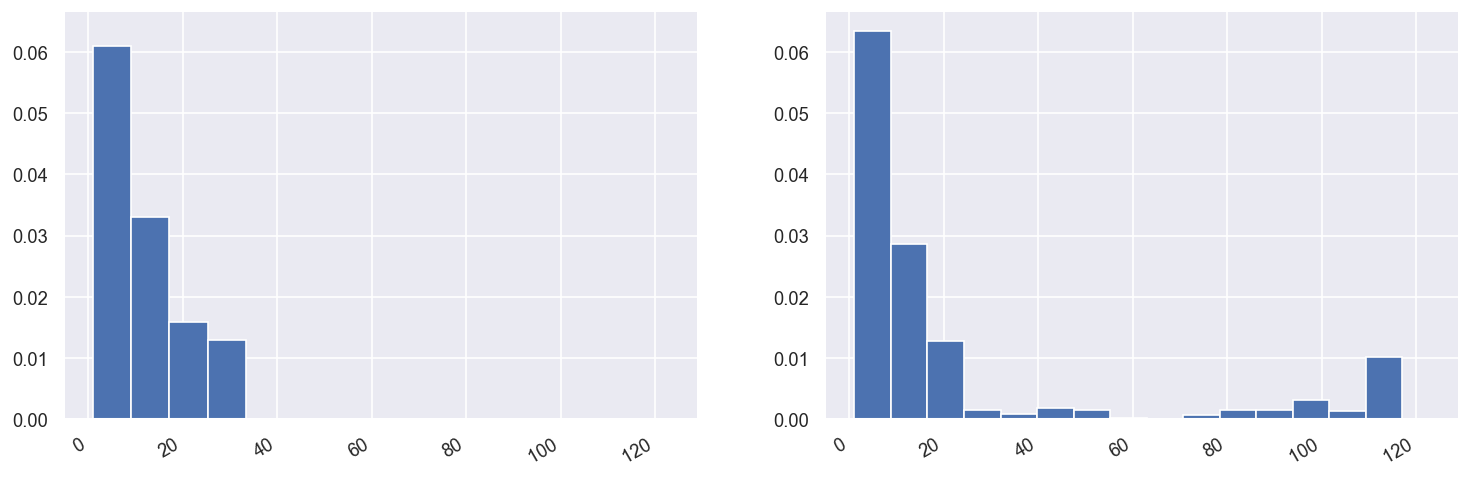

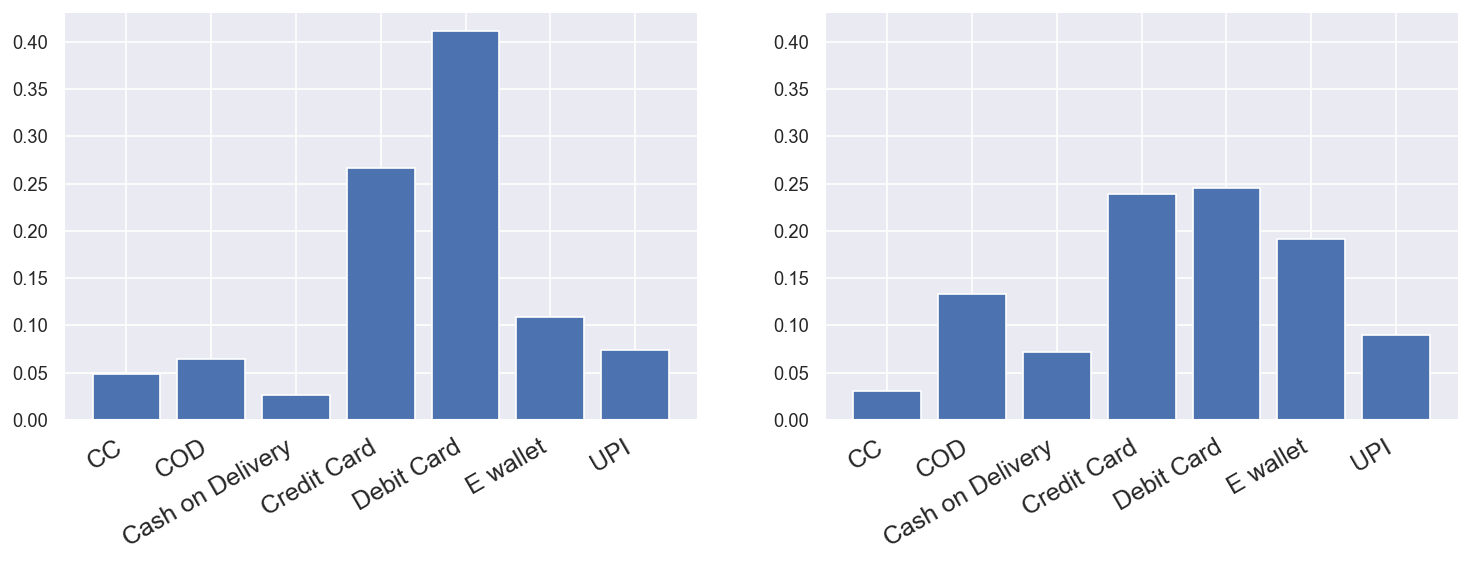

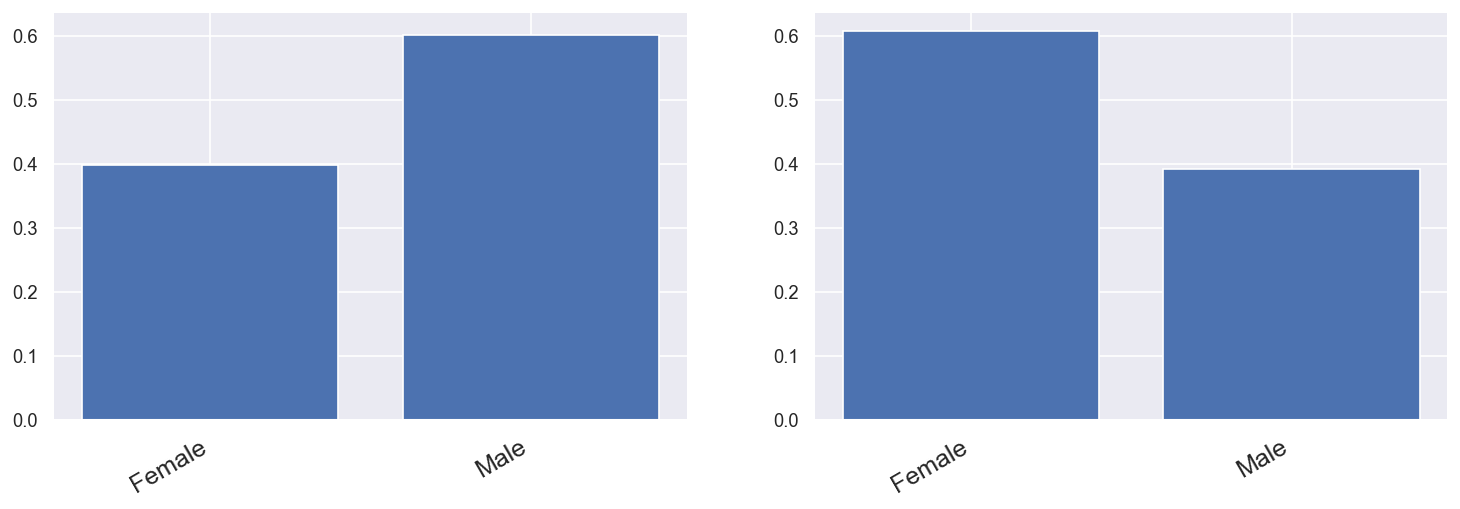

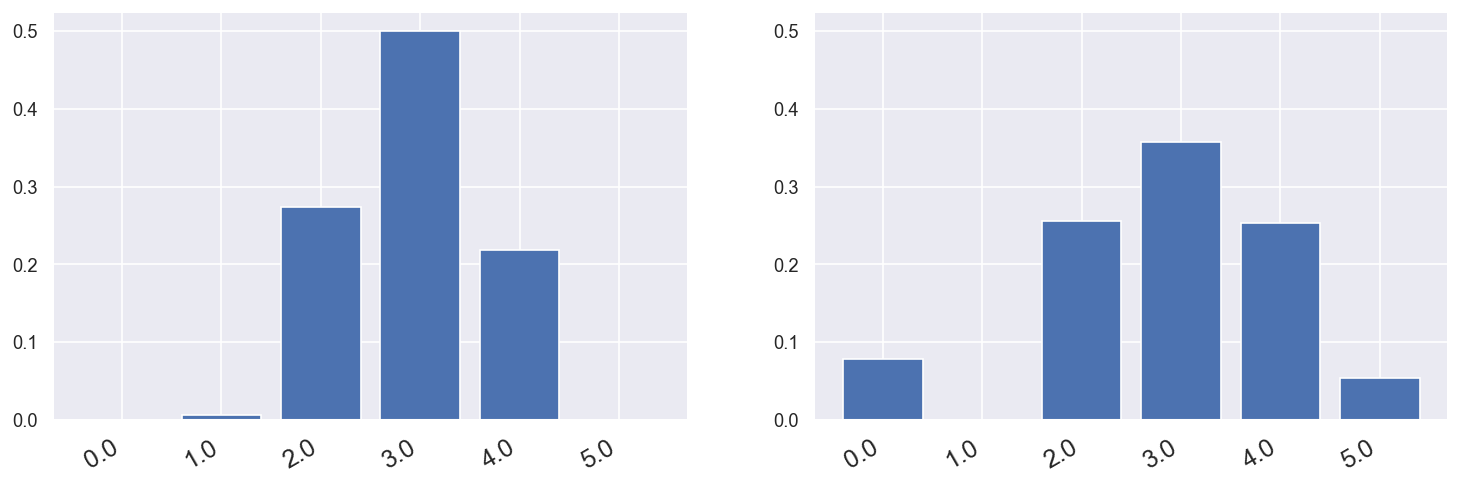

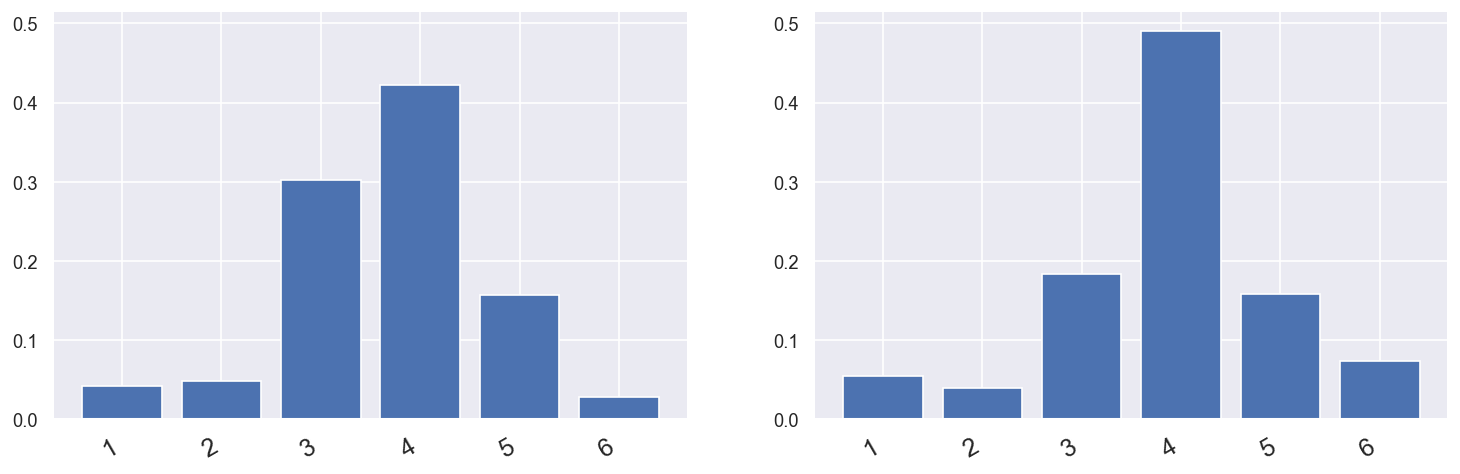

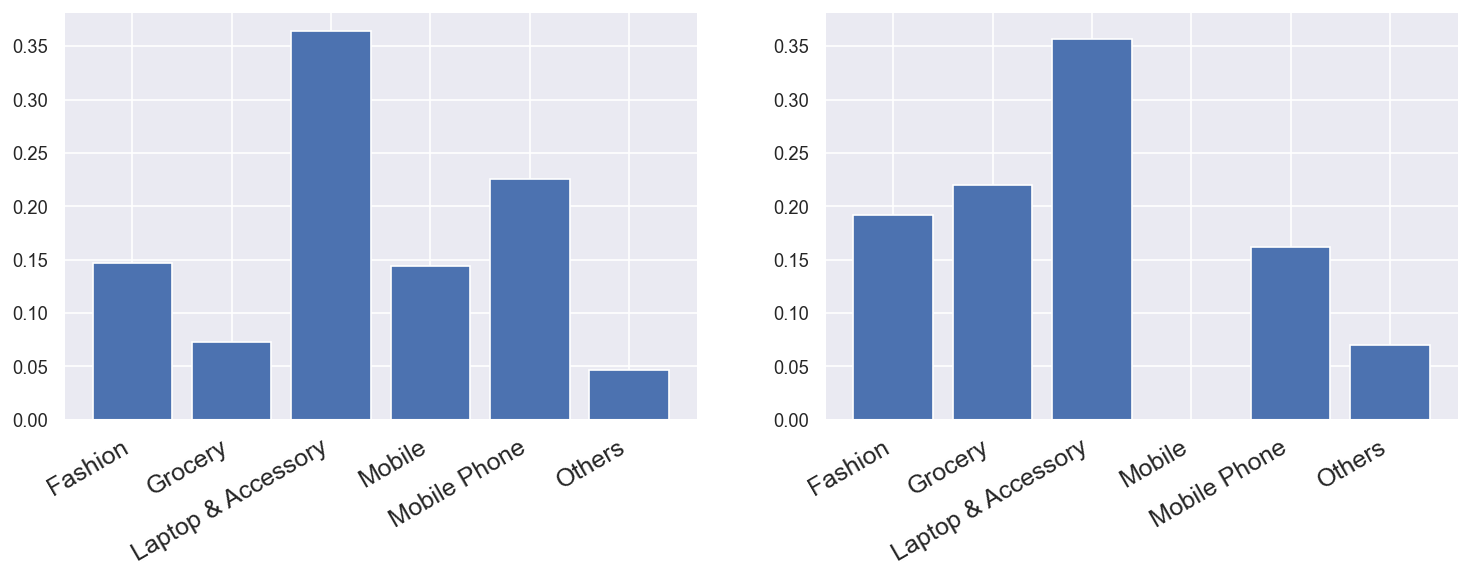

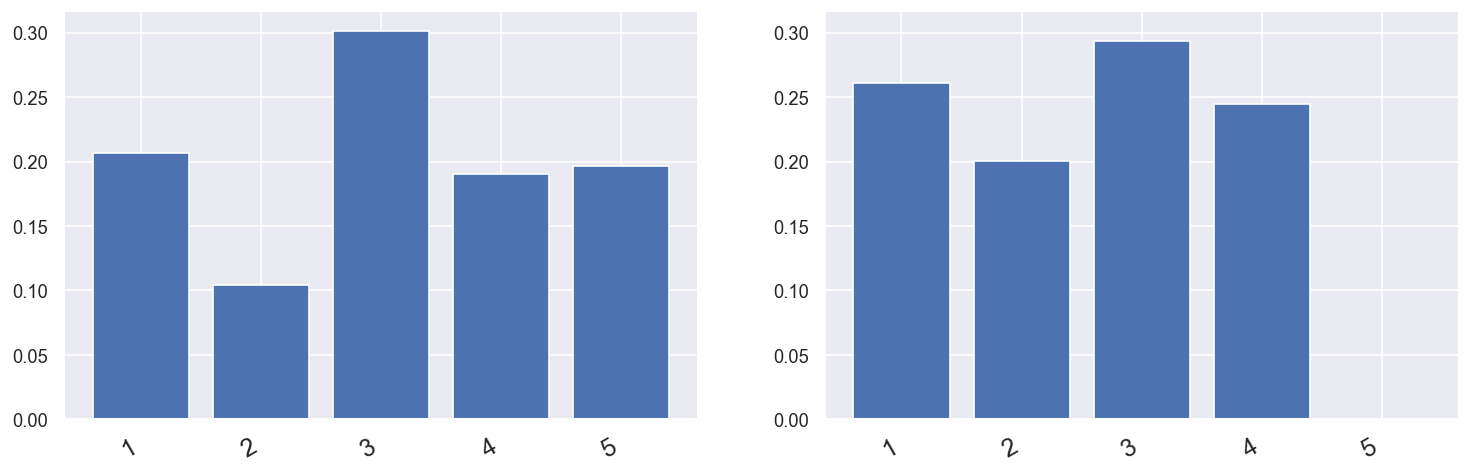

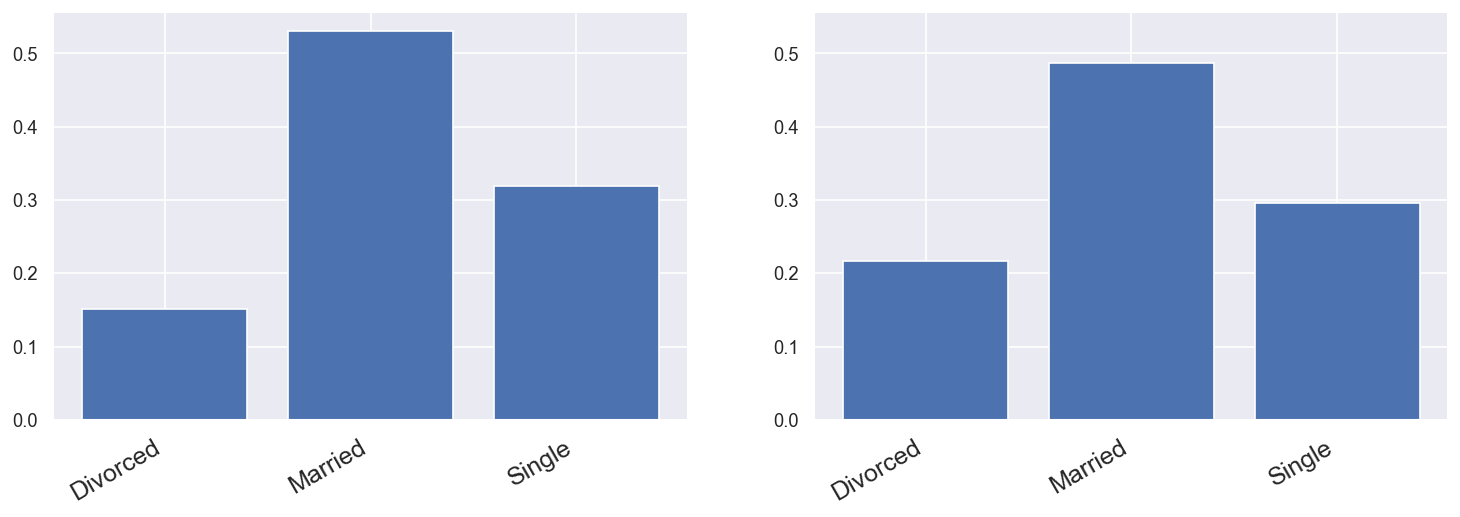

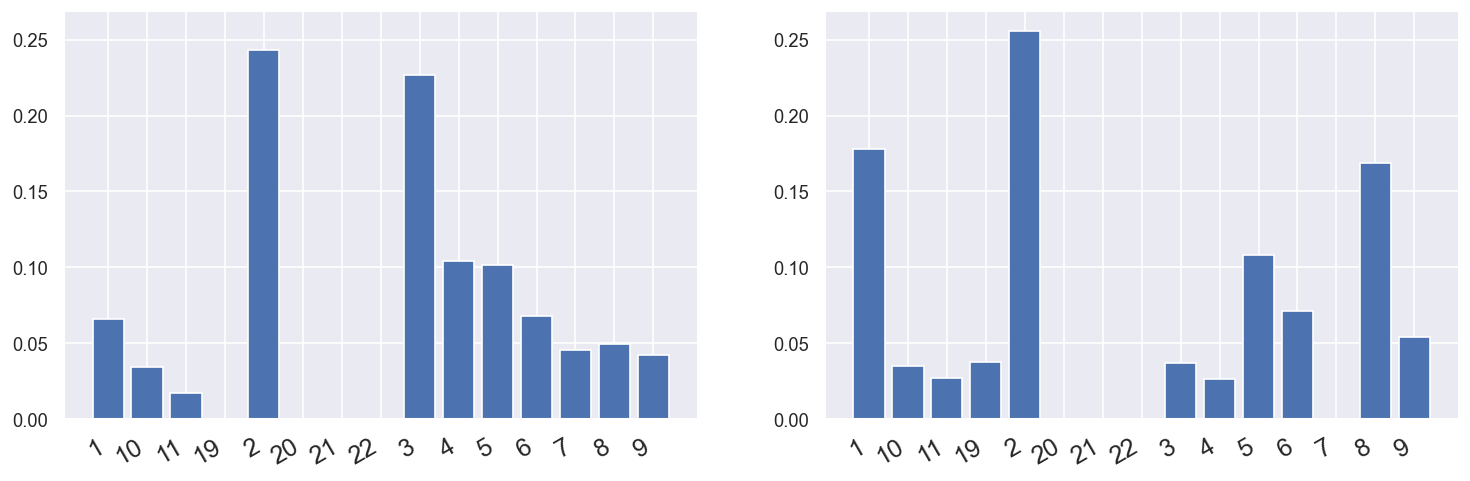

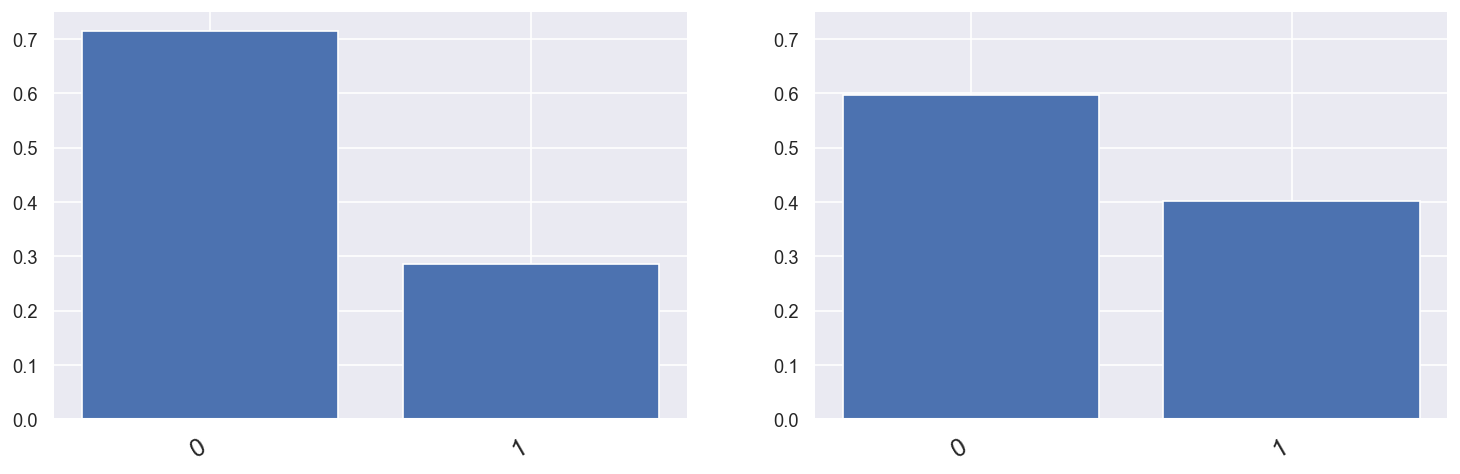

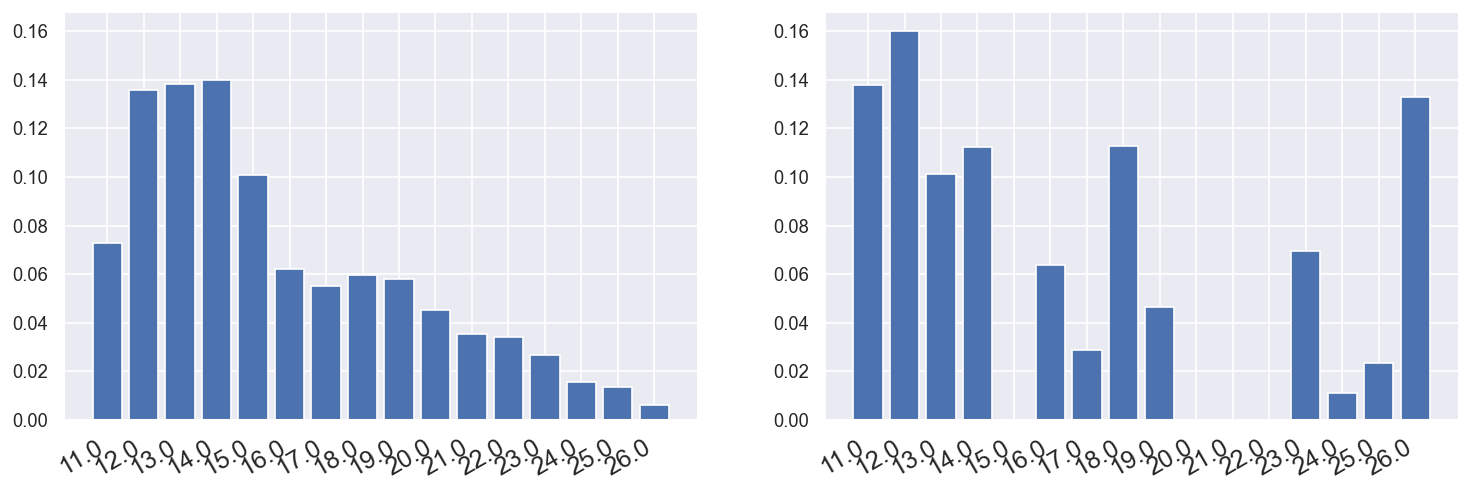

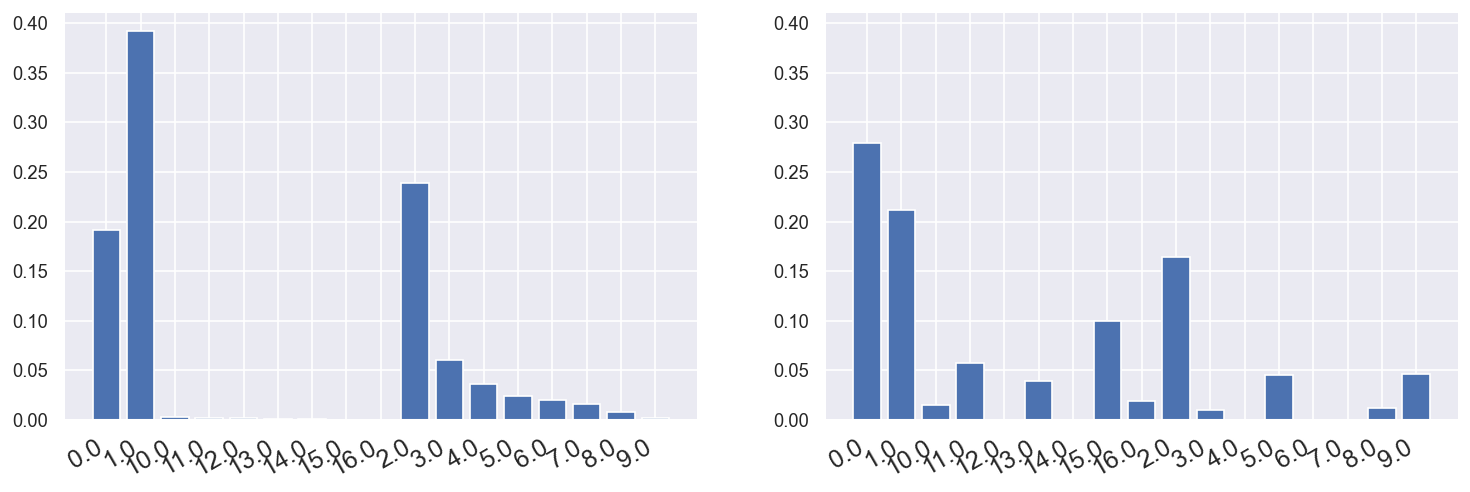

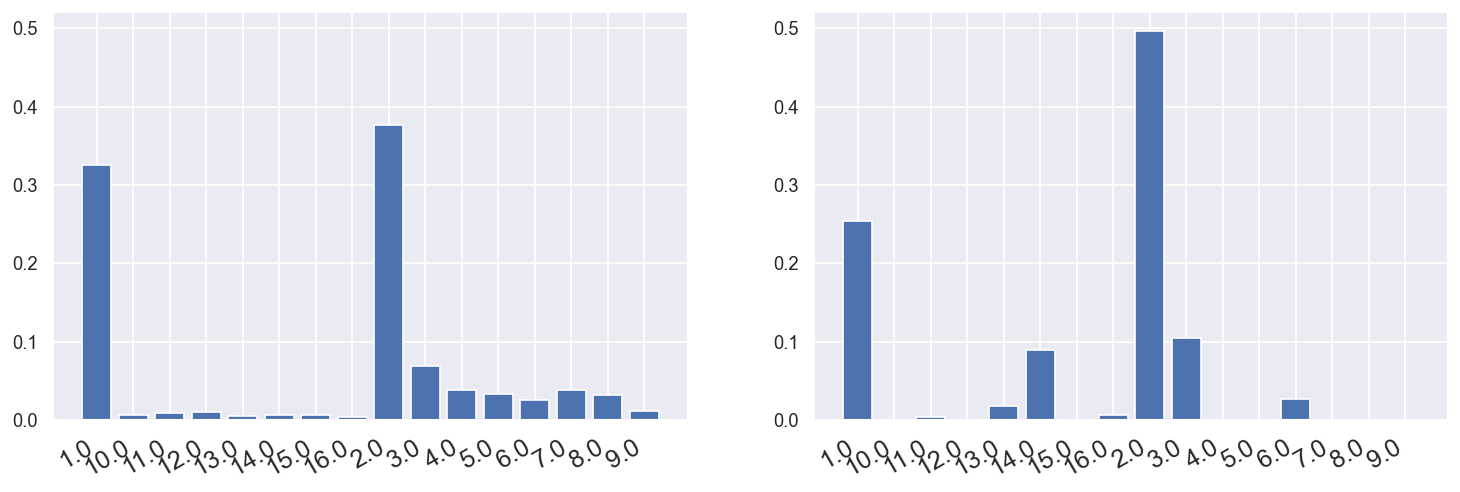

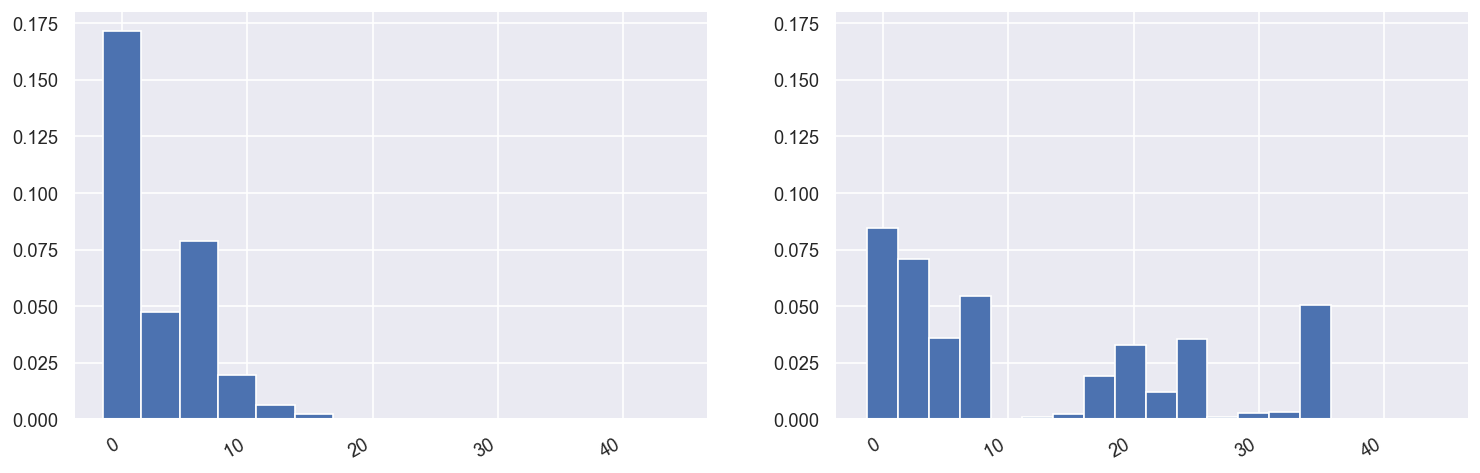

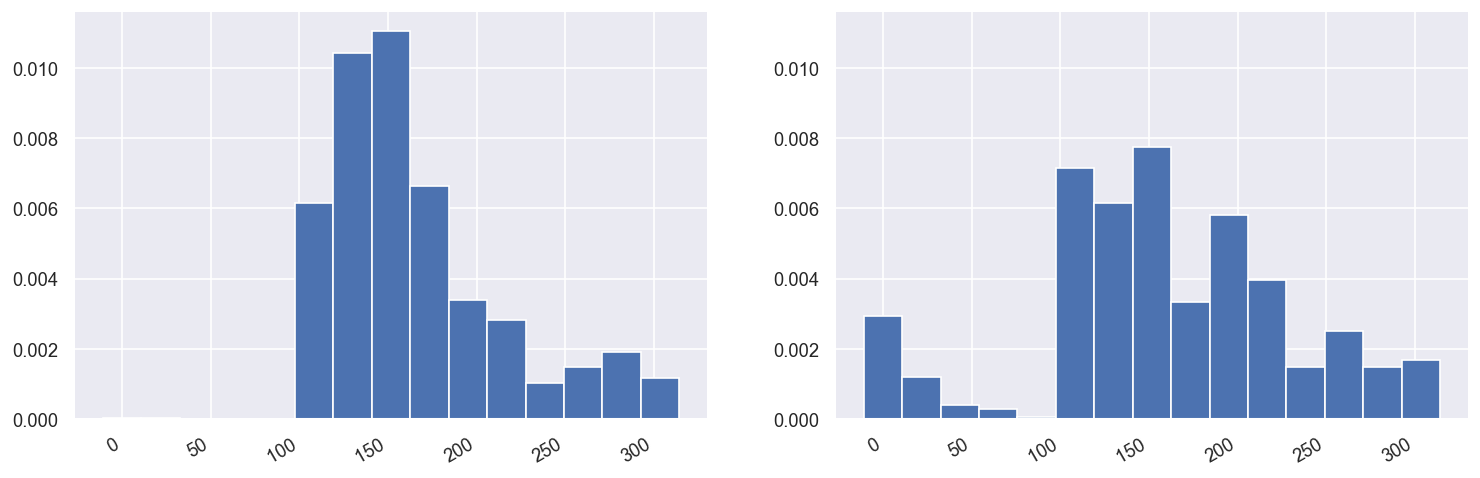

In [13]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms( attribute )